In [97]:
import pandas as pd
import numpy as np
from scipy.signal import find_peaks, peak_prominences
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection

## ID 15 CGM 결측치가 너무 많음.

15번 참가자 Food log 날짜가 범위에서 벗어남.  
  
덱스콤 실제 데이터 범위.  
2020-07-19 17:33:52  
2020-07-27 10:38:46  
  
Empatica E4 시작 시간.  
2020-07-24 07:07:49  

Food Log  
2020-02-17 10:00:00  
2020-02-25 07:30:00

In [98]:
fl_df = pd.read_csv('./big-ideas-lab-glycemic-variability-and-wearable-device-data-1.1.2/015/Food_Log_015.csv')

fl_df['date']=pd.to_datetime(fl_df['date'])
fl_df['time_begin']=pd.to_datetime(fl_df['time_begin'])

In [99]:
new_start = pd.Timestamp("2020-07-24 10:00:00")
old_start = pd.Timestamp("2020-02-17 10:00:00")

# 시간 차이 계산
time_difference = new_start - old_start

# 시간 범위 조정
fl_df['time_begin'] = fl_df['time_begin'] + time_difference

In [100]:
dexcom_df = pd.read_csv('./big-ideas-lab-glycemic-variability-and-wearable-device-data-1.1.2/015/Dexcom_015.csv')
dexcom_df.drop(dexcom_df.loc[:11].index, inplace=True)
dexcom_df.rename(columns = {'Timestamp (YYYY-MM-DDThh:mm:ss)': 'datetime'}, inplace = True)
dexcom_df['datetime']=pd.to_datetime(dexcom_df['datetime'])

In [101]:
dexcom_df.iloc[0]['datetime']

Timestamp('2020-07-19 17:38:52')

Index                                       956
Event Type                                  EGV
Event Subtype                               NaN
Patient Info                                NaN
Device Info                                 NaN
Source Device ID                      iPhone G6
Glucose Value (mg/dL)                      92.0
Insulin Value (u)                           NaN
Carb Value (grams)                          NaN
Duration (hh:mm:ss)                         NaN
Glucose Rate of Change (mg/dL/min)          NaN
Transmitter Time (Long Integer)       1591791.0
Name: 2020-07-24 00:03:49, dtype: object
2020-07-24 10:00:00
2020-07-24 10:09:00
2020-07-24 15:50:00
2020-07-24 17:50:00
2020-07-24 20:30:00
2020-07-24 20:30:00
2020-07-24 20:30:00
2020-07-25 05:45:00
2020-07-25 07:40:00
2020-07-25 07:59:00
2020-07-25 10:40:00
2020-07-25 13:10:00
2020-07-25 13:50:00
2020-07-25 18:10:00
2020-07-25 18:10:00
2020-07-26 01:10:00
2020-07-26 03:30:00
2020-07-26 04:45:00
2020-07-26 04:45:00
202

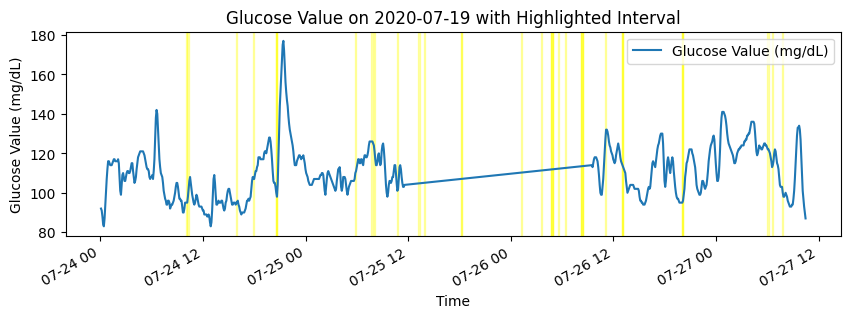

In [105]:
# 날짜 필터링
filtered_df = dexcom_df[(dexcom_df['datetime'] >= '2020-07-24 00:00:00') & (dexcom_df['datetime'] <= '2020-07-27 10:30:00')]
filtered_fl = fl_df[(fl_df['time_begin'] >= '2020-07-24 00:00:00') & (fl_df['time_begin'] <= '2020-07-27 10:30:00')]
# 인덱스를 datetime으로 설정
filtered_df.set_index('datetime', inplace=True)

# 그래프 그리기
ax = filtered_df.plot(y='Glucose Value (mg/dL)', figsize=(10, 3), legend=True)
print(filtered_df.iloc[0])

# 특정 구간 강조 (오후 2시부터 오후 6시)ㅁ
for idx in range(len(filtered_fl)):
    start_time = pd.Timestamp(filtered_fl.iloc[idx]['time_begin'])
    print(start_time)
    end_time = start_time + pd.Timedelta(minutes=10)
    plt.axvspan(start_time, end_time, color='yellow', alpha=0.3)


# 그래프 제목 및 축 라벨 설정
plt.title('Glucose Value on 2020-07-24 ~ 07-26 with Highlighted Interval')
plt.xlabel('Time')
plt.ylabel('Glucose Value (mg/dL)')

# 그래프 출력
plt.show()

Index                                      1558
Event Type                                  EGV
Event Subtype                               NaN
Patient Info                                NaN
Device Info                                 NaN
Source Device ID                      iPhone G6
Glucose Value (mg/dL)                     110.0
Insulin Value (u)                           NaN
Carb Value (grams)                          NaN
Duration (hh:mm:ss)                         NaN
Glucose Rate of Change (mg/dL/min)          NaN
Transmitter Time (Long Integer)       1850990.0
Name: 2020-07-27 00:03:46, dtype: object
2020-07-27 06:00:00
2020-07-27 06:30:00
2020-07-27 07:42:00
2020-07-27 14:07:00
2020-07-27 18:20:00
2020-07-27 18:38:00
2020-07-27 18:38:00
2020-07-27 20:55:00
2020-07-27 20:55:00
2020-07-28 04:49:00
2020-07-28 04:49:00
2020-07-28 04:49:00
2020-07-28 08:00:00
2020-07-28 08:30:00


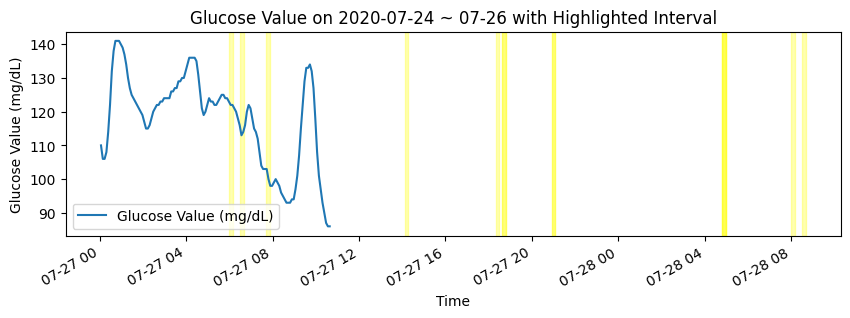

In [106]:
# 날짜 필터링
filtered_df = dexcom_df[(dexcom_df['datetime'] >= '2020-07-27 00:00:00') & (dexcom_df['datetime'] <= '2020-07-28 10:30:00')]
filtered_fl = fl_df[(fl_df['time_begin'] >= '2020-07-27 00:00:00') & (fl_df['time_begin'] <= '2020-07-28 10:30:00')]
# 인덱스를 datetime으로 설정
filtered_df.set_index('datetime', inplace=True)

# 그래프 그리기
ax = filtered_df.plot(y='Glucose Value (mg/dL)', figsize=(10, 3), legend=True)
print(filtered_df.iloc[0])

# 특정 구간 강조 (오후 2시부터 오후 6시)ㅁ
for idx in range(len(filtered_fl)):
    start_time = pd.Timestamp(filtered_fl.iloc[idx]['time_begin'])
    print(start_time)
    end_time = start_time + pd.Timedelta(minutes=10)
    plt.axvspan(start_time, end_time, color='yellow', alpha=0.3)


# 그래프 제목 및 축 라벨 설정
plt.title('Glucose Value on 2020-07-24 ~ 07-26 with Highlighted Interval')
plt.xlabel('Time')
plt.ylabel('Glucose Value (mg/dL)')

# 그래프 출력
plt.show()